In [9]:
import pandas as pd
import mysql.connector

def load_data():
    conn = mysql.connector.connect(
        host='localhost',
        user='root',
        password='',
        database='ecommerce_data'
    )
    df = pd.read_sql("SELECT * FROM shopify_products", conn)
    conn.close()
    return df

df = load_data()


/tmp/ipykernel_1705568/322337684.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM shopify_products", conn)


In [10]:
df.tail()

,store_domain,product_id,title,handle,vendor,product_type,created_at,updated_at,published_at,tags,...,variant_id,variant_title,sku,price,compare_at_price,available,variant_created_at,variant_updated_at,image_src,all_image_srcs
5256,allbirds.com,1878193471557,Men's Wool Runner - Natural Grey (Light Grey S...,mens-wool-runners,Allbirds,Shoes,2018-11-12 14:25:43,2025-05-14 10:31:26,2019-10-31 16:20:55,"allbirds::carbon-score => 7.07, allbirds::cfId...",...,30674260033616,10,WR3MNCW100,98.0,NaN,1,2019-10-10 10:10:40,2025-05-14 10:31:26,https://cdn.shopify.com/s/files/1/1104/4168/pr...,https://cdn.shopify.com/s/files/1/1104/4168/pr...
5257,allbirds.com,1878193471557,Men's Wool Runner - Natural Grey (Light Grey S...,mens-wool-runners,Allbirds,Shoes,2018-11-12 14:25:43,2025-05-14 10:31:26,2019-10-31 16:20:55,"allbirds::carbon-score => 7.07, allbirds::cfId...",...,30674264817744,11,WR3MNCW110,98.0,NaN,1,2019-10-10 10:11:16,2025-05-14 10:31:26,https://cdn.shopify.com/s/files/1/1104/4168/pr...,https://cdn.shopify.com/s/files/1/1104/4168/pr...
5258,allbirds.com,1878193471557,Men's Wool Runner - Natural Grey (Light Grey S...,mens-wool-runners,Allbirds,Shoes,2018-11-12 14:25:43,2025-05-14 10:31:26,2019-10-31 16:20:55,"allbirds::carbon-score => 7.07, allbirds::cfId...",...,30750381375568,12,WR3MNCW120,98.0,NaN,1,2019-10-15 13:01:58,2025-05-14 10:31:26,https://cdn.shopify.com/s/files/1/1104/4168/pr...,https://cdn.shopify.com/s/files/1/1104/4168/pr...
5259,allbirds.com,1878193471557,Men's Wool Runner - Natural Grey (Light Grey S...,mens-wool-runners,Allbirds,Shoes,2018-11-12 14:25:43,2025-05-14 10:31:26,2019-10-31 16:20:55,"allbirds::carbon-score => 7.07, allbirds::cfId...",...,31223893393488,13,WR3MNCW130,98.0,NaN,1,2019-11-11 10:05:35,2025-05-14 10:31:26,https://cdn.shopify.com/s/files/1/1104/4168/pr...,https://cdn.shopify.com/s/files/1/1104/4168/pr...
5260,allbirds.com,1878193471557,Men's Wool Runner - Natural Grey (Light Grey S...,mens-wool-runners,Allbirds,Shoes,2018-11-12 14:25:43,2025-05-14 10:31:26,2019-10-31 16:20:55,"allbirds::carbon-score => 7.07, allbirds::cfId...",...,31243626741840,14,WR3MNCW140,98.0,NaN,1,2019-11-12 09:42:52,2025-05-14 10:31:26,https://cdn.shopify.com/s/files/1/1104/4168/pr...,https://cdn.shopify.com/s/files/1/1104/4168/pr...


In [11]:
# Garder les colonnes utiles
df = df[[
    'title','handle' ,  'price' ,'vendor' ,'product_type'  , 'sku' ,  'available', 'tags',
    'created_at', 'updated_at' , 'image_src'
]]

# Convertir les colonnes
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['available'] = df['available'].astype(bool)
df['tags'] = df['tags'].fillna('').str.lower()


In [12]:
df.head()

,title,handle,price,vendor,product_type,sku,available,tags,created_at,updated_at,image_src
0,Women's Soft Merino Tee - Hazy Pine,womens-soft-merino-tee-hazy-pine,45.0,Allbirds,Apparel,A11548W000,True,"allbirds::carbon-score => 7.54, allbirds::cfid...",2024-12-04 21:16:45,2025-05-14 10:31:22,https://cdn.shopify.com/s/files/1/1104/4168/fi...
1,Women's Soft Merino Tee - Hazy Pine,womens-soft-merino-tee-hazy-pine,45.0,Allbirds,Apparel,A11548W001,True,"allbirds::carbon-score => 7.54, allbirds::cfid...",2024-12-04 21:16:45,2025-05-14 10:31:22,https://cdn.shopify.com/s/files/1/1104/4168/fi...
2,Women's Soft Merino Tee - Hazy Pine,womens-soft-merino-tee-hazy-pine,45.0,Allbirds,Apparel,A11548W002,True,"allbirds::carbon-score => 7.54, allbirds::cfid...",2024-12-04 21:16:45,2025-05-14 10:31:22,https://cdn.shopify.com/s/files/1/1104/4168/fi...
3,Women's Soft Merino Tee - Hazy Pine,womens-soft-merino-tee-hazy-pine,45.0,Allbirds,Apparel,A11548W003,True,"allbirds::carbon-score => 7.54, allbirds::cfid...",2024-12-04 21:16:45,2025-05-14 10:31:22,https://cdn.shopify.com/s/files/1/1104/4168/fi...
4,Women's Soft Merino Tee - Hazy Pine,womens-soft-merino-tee-hazy-pine,45.0,Allbirds,Apparel,A11548W004,True,"allbirds::carbon-score => 7.54, allbirds::cfid...",2024-12-04 21:16:45,2025-05-14 10:31:22,https://cdn.shopify.com/s/files/1/1104/4168/fi...


In [13]:
df.tail()

,title,handle,price,vendor,product_type,sku,available,tags,created_at,updated_at,image_src
5256,Men's Wool Runner - Natural Grey (Light Grey S...,mens-wool-runners,98.0,Allbirds,Shoes,WR3MNCW100,True,"allbirds::carbon-score => 7.07, allbirds::cfid...",2018-11-12 14:25:43,2025-05-14 10:31:26,https://cdn.shopify.com/s/files/1/1104/4168/pr...
5257,Men's Wool Runner - Natural Grey (Light Grey S...,mens-wool-runners,98.0,Allbirds,Shoes,WR3MNCW110,True,"allbirds::carbon-score => 7.07, allbirds::cfid...",2018-11-12 14:25:43,2025-05-14 10:31:26,https://cdn.shopify.com/s/files/1/1104/4168/pr...
5258,Men's Wool Runner - Natural Grey (Light Grey S...,mens-wool-runners,98.0,Allbirds,Shoes,WR3MNCW120,True,"allbirds::carbon-score => 7.07, allbirds::cfid...",2018-11-12 14:25:43,2025-05-14 10:31:26,https://cdn.shopify.com/s/files/1/1104/4168/pr...
5259,Men's Wool Runner - Natural Grey (Light Grey S...,mens-wool-runners,98.0,Allbirds,Shoes,WR3MNCW130,True,"allbirds::carbon-score => 7.07, allbirds::cfid...",2018-11-12 14:25:43,2025-05-14 10:31:26,https://cdn.shopify.com/s/files/1/1104/4168/pr...
5260,Men's Wool Runner - Natural Grey (Light Grey S...,mens-wool-runners,98.0,Allbirds,Shoes,WR3MNCW140,True,"allbirds::carbon-score => 7.07, allbirds::cfid...",2018-11-12 14:25:43,2025-05-14 10:31:26,https://cdn.shopify.com/s/files/1/1104/4168/pr...


In [14]:
from sklearn.preprocessing import MinMaxScaler

# Crée une colonne de "score" synthétique (0-1)
df['availability_score'] = df['available'].astype(int)
df['tag_score'] = df['tags'].apply(lambda x: len(x.split(',')))  # Popularité par tags

scaler = MinMaxScaler()
df[['price_norm']] = scaler.fit_transform(df[['price']])
df['price_score'] = 1 - df['price_norm']  # Produits moins chers = meilleurs

# Score final (pondérations ajustables)
df['score'] = 0.5 * df['availability_score'] + 0.3 * df['price_score'] + 0.2 * df['tag_score']


In [15]:
df.head()

,title,handle,price,vendor,product_type,sku,available,tags,created_at,updated_at,image_src,availability_score,tag_score,price_norm,price_score,score
0,Women's Soft Merino Tee - Hazy Pine,womens-soft-merino-tee-hazy-pine,45.0,Allbirds,Apparel,A11548W000,True,"allbirds::carbon-score => 7.54, allbirds::cfid...",2024-12-04 21:16:45,2025-05-14 10:31:22,https://cdn.shopify.com/s/files/1/1104/4168/fi...,1,14,0.086345,0.913655,3.574096
1,Women's Soft Merino Tee - Hazy Pine,womens-soft-merino-tee-hazy-pine,45.0,Allbirds,Apparel,A11548W001,True,"allbirds::carbon-score => 7.54, allbirds::cfid...",2024-12-04 21:16:45,2025-05-14 10:31:22,https://cdn.shopify.com/s/files/1/1104/4168/fi...,1,14,0.086345,0.913655,3.574096
2,Women's Soft Merino Tee - Hazy Pine,womens-soft-merino-tee-hazy-pine,45.0,Allbirds,Apparel,A11548W002,True,"allbirds::carbon-score => 7.54, allbirds::cfid...",2024-12-04 21:16:45,2025-05-14 10:31:22,https://cdn.shopify.com/s/files/1/1104/4168/fi...,1,14,0.086345,0.913655,3.574096
3,Women's Soft Merino Tee - Hazy Pine,womens-soft-merino-tee-hazy-pine,45.0,Allbirds,Apparel,A11548W003,True,"allbirds::carbon-score => 7.54, allbirds::cfid...",2024-12-04 21:16:45,2025-05-14 10:31:22,https://cdn.shopify.com/s/files/1/1104/4168/fi...,1,14,0.086345,0.913655,3.574096
4,Women's Soft Merino Tee - Hazy Pine,womens-soft-merino-tee-hazy-pine,45.0,Allbirds,Apparel,A11548W004,True,"allbirds::carbon-score => 7.54, allbirds::cfid...",2024-12-04 21:16:45,2025-05-14 10:31:22,https://cdn.shopify.com/s/files/1/1104/4168/fi...,1,14,0.086345,0.913655,3.574096


In [16]:
df.tail()

,title,handle,price,vendor,product_type,sku,available,tags,created_at,updated_at,image_src,availability_score,tag_score,price_norm,price_score,score
5256,Men's Wool Runner - Natural Grey (Light Grey S...,mens-wool-runners,98.0,Allbirds,Shoes,WR3MNCW100,True,"allbirds::carbon-score => 7.07, allbirds::cfid...",2018-11-12 14:25:43,2025-05-14 10:31:26,https://cdn.shopify.com/s/files/1/1104/4168/pr...,1,17,0.192771,0.807229,4.142169
5257,Men's Wool Runner - Natural Grey (Light Grey S...,mens-wool-runners,98.0,Allbirds,Shoes,WR3MNCW110,True,"allbirds::carbon-score => 7.07, allbirds::cfid...",2018-11-12 14:25:43,2025-05-14 10:31:26,https://cdn.shopify.com/s/files/1/1104/4168/pr...,1,17,0.192771,0.807229,4.142169
5258,Men's Wool Runner - Natural Grey (Light Grey S...,mens-wool-runners,98.0,Allbirds,Shoes,WR3MNCW120,True,"allbirds::carbon-score => 7.07, allbirds::cfid...",2018-11-12 14:25:43,2025-05-14 10:31:26,https://cdn.shopify.com/s/files/1/1104/4168/pr...,1,17,0.192771,0.807229,4.142169
5259,Men's Wool Runner - Natural Grey (Light Grey S...,mens-wool-runners,98.0,Allbirds,Shoes,WR3MNCW130,True,"allbirds::carbon-score => 7.07, allbirds::cfid...",2018-11-12 14:25:43,2025-05-14 10:31:26,https://cdn.shopify.com/s/files/1/1104/4168/pr...,1,17,0.192771,0.807229,4.142169
5260,Men's Wool Runner - Natural Grey (Light Grey S...,mens-wool-runners,98.0,Allbirds,Shoes,WR3MNCW140,True,"allbirds::carbon-score => 7.07, allbirds::cfid...",2018-11-12 14:25:43,2025-05-14 10:31:26,https://cdn.shopify.com/s/files/1/1104/4168/pr...,1,17,0.192771,0.807229,4.142169


In [18]:
K = 10
top_k = df.sort_values(by='score', ascending=False).head(K)

print(top_k[[ 'title', 'price', 'available', 'score']])


                                                  title  price  available  \
1603  Women's Tree Dasher 2 - Natural Black/Thunder ...   94.0       True   
1602  Women's Tree Dasher 2 - Natural Black/Thunder ...   94.0       True   
1595  Women's Tree Dasher 2 - Natural Black/Thunder ...   94.0       True   
1592  Women's Tree Dasher 2 - Natural Black/Thunder ...   94.0       True   
1591  Women's Tree Dasher 2 - Natural Black/Thunder ...   94.0       True   
1596  Women's Tree Dasher 2 - Natural Black/Thunder ...   94.0       True   
1668  Men's Tree Dasher 2 - Natural Black/Thunder Re...   94.0       True   
1995  Men's Tree Dasher 2 - Twilight White/Twilight ...  135.0       True   
1994  Men's Tree Dasher 2 - Twilight White/Twilight ...  135.0       True   
1816  Women's Tree Dasher 2 - Twilight White/Twiligh...  135.0       True   

         score  
1603  4.544578  
1602  4.544578  
1595  4.544578  
1592  4.544578  
1591  4.544578  
1596  4.544578  
1668  4.544578  
1995  4.519880  

In [29]:
from sklearn.cluster import KMeans

features = df[['price_score', 'availability_score', 'tag_score']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(features)


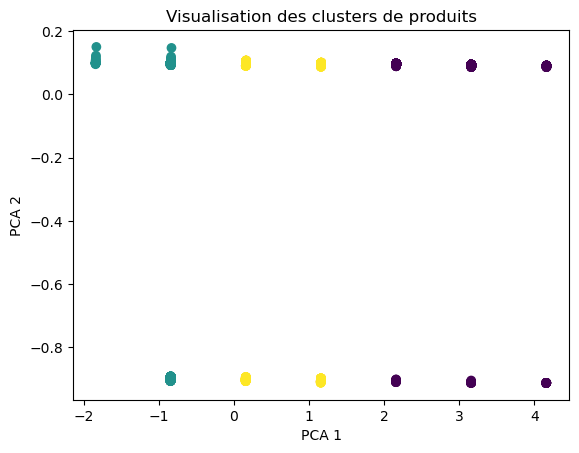

In [30]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced = pca.fit_transform(features)

plt.scatter(reduced[:, 0], reduced[:, 1], c=df['cluster'])
plt.title('Visualisation des clusters de produits')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()
